# Sentiment Analysis on airline company


**Business Problem Statement:**

The leading airline company aims to improve customer satisfaction and address issues promptly by analyzing feedback provided on various platforms, including Twitter. However, manually sorting through a large volume of tweets and identifying sentiments and specific problems can be time-consuming and inefficient. Therefore, the company seeks to implement a Deep Learning Natural Language Processing (NLP) solution to automate sentiment analysis and categorize the problems mentioned in customer feedback.

**Objectives:**

1. Automate sentiment analysis of customer feedback tweets.
2. Categorize negative tweets based on specific problems mentioned (e.g., "late flight," "rude service").
3. Deploy the sentiment analysis model into a user-friendly web application using Streamlit.
4. Ensure the robustness and scalability of the solution for production use.

**Workflow Roadmap:**

1. **Data Collection and Preprocessing:**
   - Collect Twitter data from February 2015 containing feedback about major U.S. airlines.
   - Preprocess the data to remove noise, such as special characters, URLs, and irrelevant information.

2. **Data Labeling:**
   - Manually label the tweets as positive, negative, or neutral to create a labeled dataset for training the sentiment analysis model.
   - Further categorize negative tweets based on the specific problems mentioned (e.g., late flight, rude service) to enable fine-grained analysis.

3. **Model Selection and Training:**
   - Choose an appropriate Deep Learning NLP model architecture such as LSTM, GRU, or Transformer-based models like BERT, GPT, etc., considering the size of the dataset and computational resources.
   - Train the selected model on the labeled dataset for sentiment analysis and problem categorization.
   - Utilize techniques like transfer learning if necessary to leverage pre-trained language representations.

4. **Model Evaluation and Fine-Tuning:**
   - Evaluate the trained model's performance using metrics like accuracy, precision, recall, and F1-score.
   - Fine-tune the model based on evaluation results to enhance its performance and generalization capabilities.

5. **Model Deployment:**
   - Develop a user-friendly web application using Streamlit for deploying the sentiment analysis model.
   - Integrate the model into the web app to allow users to input tweets and receive sentiment analysis results along with categorized problems.
   - Ensure seamless integration with the existing systems and infrastructure of the airline company.

6. **Testing and Validation:**
   - Conduct thorough testing of the deployed web application to ensure its functionality, usability, and performance.
   - Validate the sentiment analysis results and problem categorization accuracy against a holdout dataset or through manual verification.

7. **Monitoring and Maintenance:**
   - Implement monitoring mechanisms to track the performance of the deployed model in real-time.
   - Regularly update the model and retrain it on new data to adapt to evolving trends and customer feedback.
   - Provide continuous maintenance and support to address any issues or updates required for the web application.

## 1. **Data Collection and Preprocessing:**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
# load data
try:
    
    train = pd.read_csv("../../datasets/Airline-Sentiment.csv", encoding="utf-8")
except  UnicodeDecodeError:
    print("failed to load UnicodeDecodeError... trying  another encoding.....")
    train = pd.read_csv('../../datasets/Airline-Sentiment.csv', encoding="latin-1")
    print("Succesfully encoded dataset.")
    
    

failed to load UnicodeDecodeError... trying  another encoding.....
Succesfully encoded dataset.


In [3]:
train.sample(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
2022,681451256,False,finalized,3,2/25/15 2:45,neutral,0.6876,NaN,0.0,United,NaN,fabricelion,NaN,0,@united are you looking for European Flight at...,NaN,2/22/15 4:13,5.694700e+17,Belgium,Brussels
10241,681461532,False,finalized,3,2/25/15 8:08,negative,1.0000,Customer Service Issue,1.0,US Airways,NaN,WheresRUsso,NaN,0,@USAirways ever think about hiring more agents...,NaN,2/22/15 3:55,5.694660e+17,NaN,Eastern Time (US & Canada)


In [4]:
train.describe().round(2)

,_unit_id,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,1.464000e+04,14640.00,14640.00,10522.00,14640.00,1.464000e+04
mean,6.814957e+08,3.62,0.90,0.64,0.08,5.692184e+17
std,8.504314e+04,11.86,0.16,0.33,0.75,7.791092e+14
min,6.814482e+08,2.00,0.34,0.00,0.00,5.675880e+17
25%,6.814536e+08,3.00,0.69,0.36,0.00,5.685590e+17
50%,6.814578e+08,3.00,1.00,0.67,0.00,5.694780e+17
75%,6.814623e+08,3.00,1.00,1.00,0.00,5.698902e+17
max,6.816798e+08,248.00,1.00,1.00,44.00,5.703110e+17


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [6]:
# check null value
train.isnull().any()


_unit_id                        False
_golden                         False
_unit_state                     False
_trusted_judgments              False
_last_judgment_at                True
airline_sentiment               False
airline_sentiment:confidence    False
negativereason                   True
negativereason:confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_id                        False
tweet_location                   True
user_timezone                    True
dtype: bool

In [7]:
print(f"Total no of null columns :{train.isnull().any().sum()}")

Total no of null columns :8


In [8]:
# Assuming train is your DataFrame
null_percentage = (train.isnull().sum() / len(train) * 100)
null_percentage_formatted = null_percentage.apply(lambda x: f"{x:.2f}%")
print("Total number of percentage of each null column:")
print(null_percentage_formatted)


Total number of percentage of each null column:
_unit_id                         0.00%
_golden                          0.00%
_unit_state                      0.00%
_trusted_judgments               0.00%
_last_judgment_at                0.38%
airline_sentiment                0.00%
airline_sentiment:confidence     0.00%
negativereason                  37.31%
negativereason:confidence       28.13%
airline                          0.00%
airline_sentiment_gold          99.73%
name                             0.00%
negativereason_gold             99.78%
retweet_count                    0.00%
text                             0.00%
tweet_coord                     93.04%
tweet_created                    0.00%
tweet_id                         0.00%
tweet_location                  32.33%
user_timezone                   32.92%
dtype: object


In [9]:
# Find importent columns
# Set a threshold for considering columns as important (e.g., 30%)
threshold = 0

# Filter columns with null percentage above the threshold
important_columns = null_percentage[null_percentage > threshold]

print("Null columns:")
print(important_columns)

Null columns:
_last_judgment_at             0.382514
negativereason               37.308743
negativereason:confidence    28.128415
airline_sentiment_gold       99.726776
negativereason_gold          99.781421
tweet_coord                  93.039617
tweet_location               32.329235
user_timezone                32.923497
dtype: float64


In [10]:
train.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
# delete unnessary columns
train = train.drop(["_unit_id","tweet_id","name","tweet_location","tweet_created","user_timezone","airline_sentiment_gold","negativereason_gold","tweet_coord", "_last_judgment_at"], axis = 1)

In [12]:
train.head(2)

,_golden,_unit_state,_trusted_judgments,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text
0,False,finalized,3,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.
1,False,finalized,3,positive,0.3486,NaN,0.0,Virgin America,0,@VirginAmerica plus you've added commercials t...


In [13]:
train["_golden"].value_counts()

_golden
False    14600
True        40
Name: count, dtype: int64

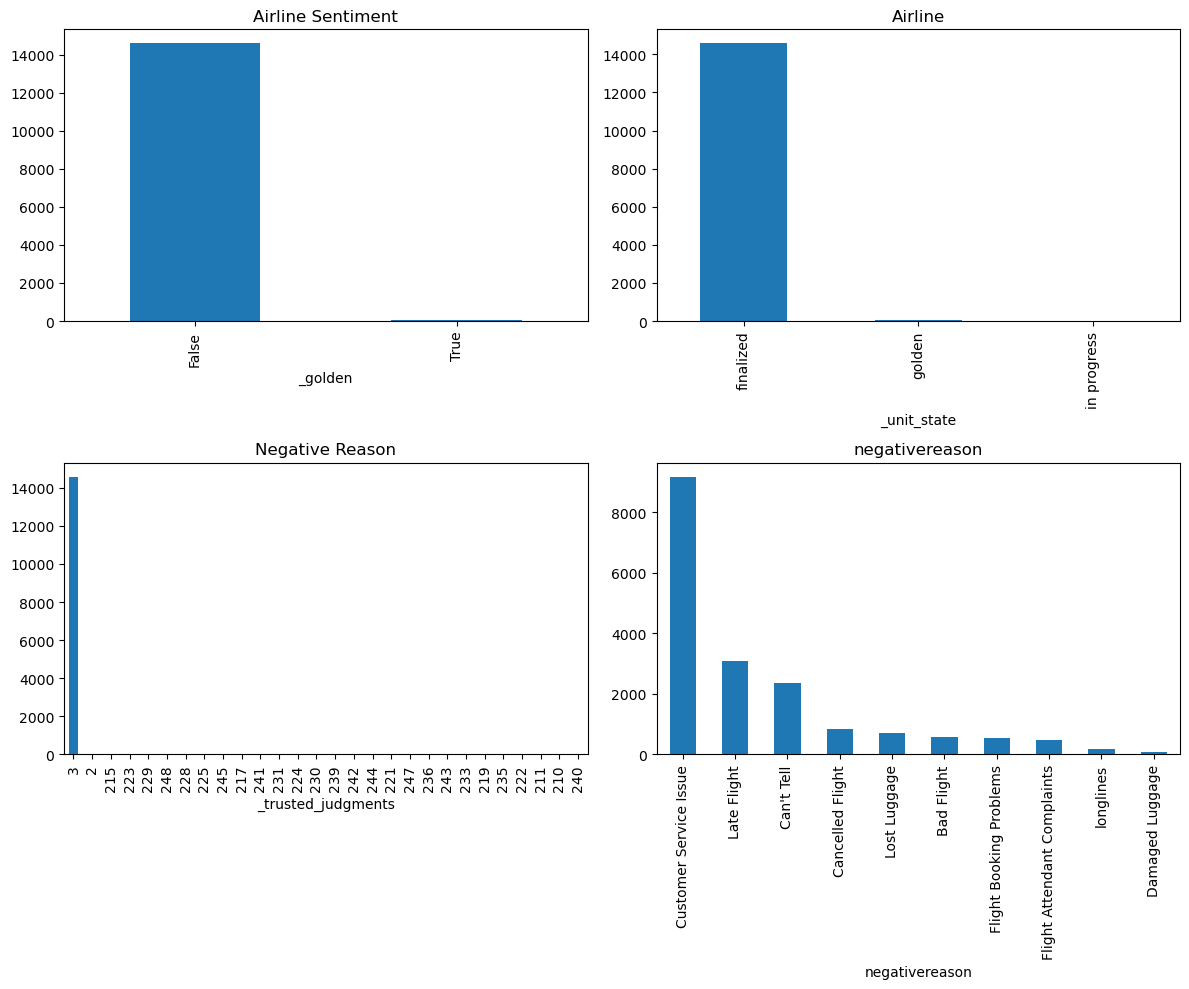

In [14]:
import matplotlib.pyplot as plt

# Assuming train is your DataFrame
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot value counts for 'airline_sentiment' column
train['_golden'].value_counts().plot(kind='bar', ax=axes[0, 0], title='Airline Sentiment')

# Plot value counts for 'airline' column
train['_unit_state'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Airline')

# Plot value counts for 'negativereason' column
train['_trusted_judgments'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Negative Reason')

# Plot value counts for 'tweet_location' column
train['airline_sentiment'].value_counts().head(10).plot(kind='bar', ax=axes[1, 1], title='Top 10 Tweet Locations')

train['negativereason'].value_counts().head(10).plot(kind="bar", ax=axes[1,1], title="negativereason")



plt.tight_layout()
plt.show()


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _golden                       14640 non-null  bool   
 1   _unit_state                   14640 non-null  object 
 2   _trusted_judgments            14640 non-null  int64  
 3   airline_sentiment             14640 non-null  object 
 4   airline_sentiment:confidence  14640 non-null  float64
 5   negativereason                9178 non-null   object 
 6   negativereason:confidence     10522 non-null  float64
 7   airline                       14640 non-null  object 
 8   retweet_count                 14640 non-null  int64  
 9   text                          14640 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 1.0+ MB


In [16]:
# Assuming train is your DataFrame
df = train.rename(columns=lambda x: x.strip())

# Now you can use df instead of train
df.tail(2)

,_golden,_unit_state,_trusted_judgments,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text
14638,False,finalized,3,negative,1.0000,Customer Service Issue,0.6659,American,0,"@AmericanAir you have my money, you change my ..."
14639,False,finalized,3,neutral,0.6771,NaN,0.0000,American,0,@AmericanAir we have 8 ppl so we need 2 know h...


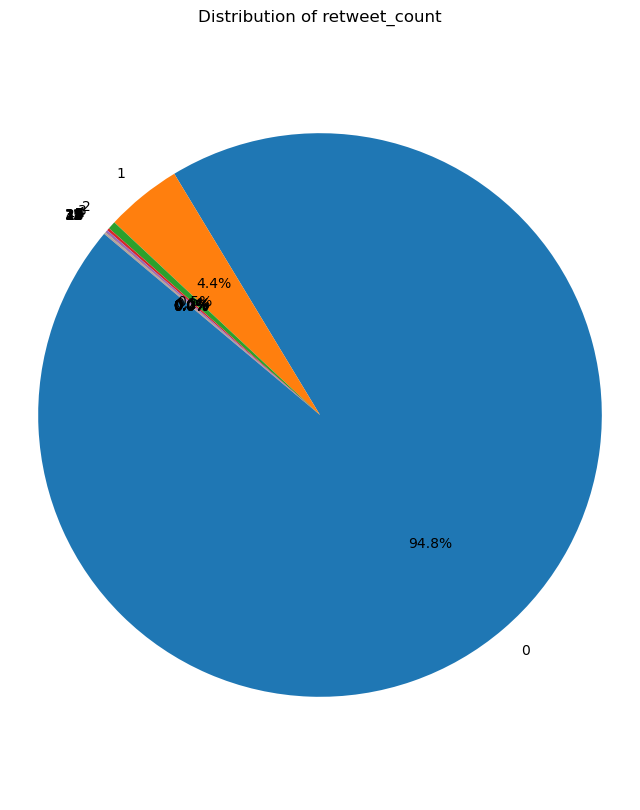

In [17]:
# Calculate value counts for 'negativereason' column
retweet_count = df['retweet_count'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 10))
plt.pie(retweet_count, labels=retweet_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of retweet_count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


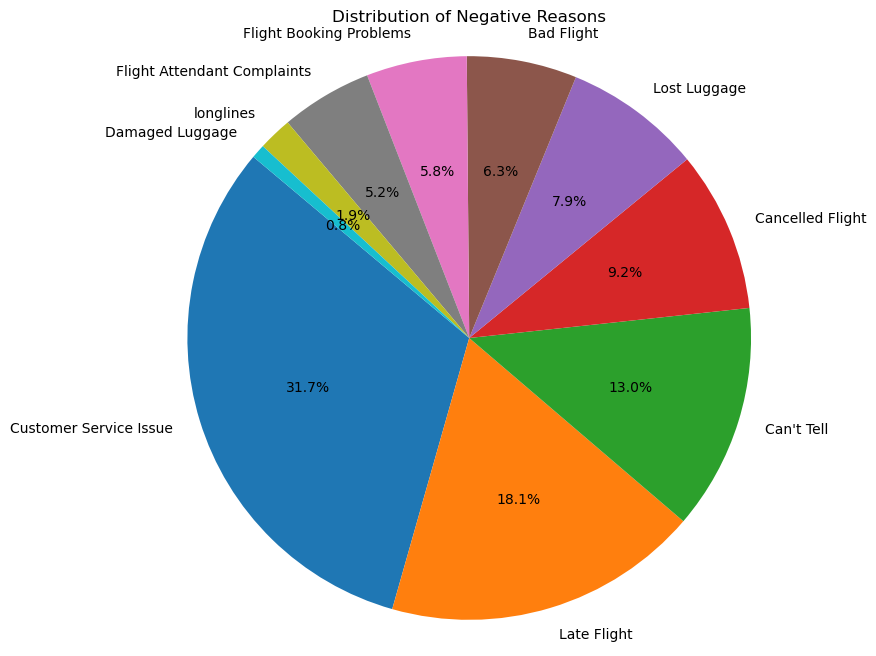

In [18]:
# Calculate value counts for 'negativereason' column
neg_reason_counts = df['negativereason'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(neg_reason_counts, labels=neg_reason_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Negative Reasons')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


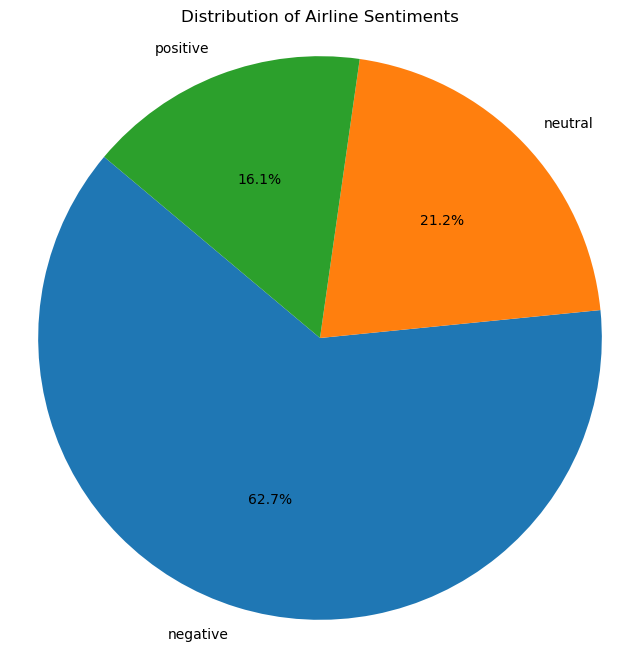

In [19]:
# Calculate value counts for 'airline_sentiment' column
sentiment_counts = df['airline_sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airline Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [20]:
# Assuming df is your DataFrame
# Replace 'df' with 'train' if you haven't renamed it

# Count null values in each column
null_counts = df.isnull().sum()

print("Null value counts for each column:")
print(null_counts)


Null value counts for each column:
_golden                            0
_unit_state                        0
_trusted_judgments                 0
airline_sentiment                  0
airline_sentiment:confidence       0
negativereason                  5462
negativereason:confidence       4118
airline                            0
retweet_count                      0
text                               0
dtype: int64


In [21]:
# val = 0
# for i in range(len(df.negativereason)):
#     if df.negativereason == "NaN":
#         val += 1
# print("Total NaN Value is :",val)        
        

In [22]:
# fill null value
df['negativereason'].fillna("no reason", inplace=True)

In [23]:
df["negativereason:confidence"].fillna(df["negativereason:confidence"].mean(), inplace = True)

In [24]:
df.isnull().sum()

_golden                         0
_unit_state                     0
_trusted_judgments              0
airline_sentiment               0
airline_sentiment:confidence    0
negativereason                  0
negativereason:confidence       0
airline                         0
retweet_count                   0
text                            0
dtype: int64

In [25]:
df["negativereason:confidence"]

0        0.638298
1        0.000000
2        0.638298
3        0.703300
4        1.000000
           ...   
14635    0.000000
14636    1.000000
14637    0.638298
14638    0.665900
14639    0.000000
Name: negativereason:confidence, Length: 14640, dtype: float64

In [26]:
df.negativereason

0                     no reason
1                     no reason
2                     no reason
3                    Bad Flight
4                    Can't Tell
                  ...          
14635                 no reason
14636    Customer Service Issue
14637                 no reason
14638    Customer Service Issue
14639                 no reason
Name: negativereason, Length: 14640, dtype: object

In [27]:
df.describe().round(2)

,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count
count,14640.00,14640.00,14640.00,14640.00
mean,3.62,0.90,0.64,0.08
std,11.86,0.16,0.28,0.75
min,2.00,0.34,0.00,0.00
25%,3.00,0.69,0.64,0.00
50%,3.00,1.00,0.64,0.00
75%,3.00,1.00,0.70,0.00
max,248.00,1.00,1.00,44.00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _golden                       14640 non-null  bool   
 1   _unit_state                   14640 non-null  object 
 2   _trusted_judgments            14640 non-null  int64  
 3   airline_sentiment             14640 non-null  object 
 4   airline_sentiment:confidence  14640 non-null  float64
 5   negativereason                14640 non-null  object 
 6   negativereason:confidence     14640 non-null  float64
 7   airline                       14640 non-null  object 
 8   retweet_count                 14640 non-null  int64  
 9   text                          14640 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 1.0+ MB


In [29]:
df.sample(4)

,_golden,_unit_state,_trusted_judgments,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text
10759,False,finalized,3,negative,1.0000,Customer Service Issue,0.691100,US Airways,0,@USAirways Nightmarish customer service. Furth...
7168,False,finalized,3,positive,1.0000,no reason,0.638298,Delta,0,@JetBlue Looking cool
9214,False,finalized,3,negative,0.6769,Flight Booking Problems,0.676900,US Airways,0,@USAirways no i use to skyscanner and travel a...
12043,False,finalized,3,negative,1.0000,Can't Tell,0.675800,American,0,@AmericanAir why would I pay $200 to reactivat...


In [30]:
df.retweet_count.value_counts()

retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: count, dtype: int64

## 2. **Data Labeling:**

In [31]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder



In [32]:
df

,_golden,_unit_state,_trusted_judgments,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text
0,False,finalized,3,neutral,1.0000,no reason,0.638298,Virgin America,0,@VirginAmerica What @dhepburn said.
1,False,finalized,3,positive,0.3486,no reason,0.000000,Virgin America,0,@VirginAmerica plus you've added commercials t...
2,False,finalized,3,neutral,0.6837,no reason,0.638298,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...
3,False,finalized,3,negative,1.0000,Bad Flight,0.703300,Virgin America,0,@VirginAmerica it's really aggressive to blast...
4,False,finalized,3,negative,1.0000,Can't Tell,1.000000,Virgin America,0,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...,...,...,...,...,...
14635,False,finalized,3,positive,0.3487,no reason,0.000000,American,0,@AmericanAir thank you we got on a different f...
14636,False,finalized,3,negative,1.0000,Customer Service Issue,1.000000,American,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,False,finalized,3,neutral,1.0000,no reason,0.638298,American,0,@AmericanAir Please bring American Airlines to...
14638,False,finalized,3,negative,1.0000,Customer Service Issue,0.665900,American,0,"@AmericanAir you have my money, you change my ..."


### Label Encoding

In [33]:
df.sample(1)

,_golden,_unit_state,_trusted_judgments,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text
7091,False,finalized,3,neutral,1.0,no reason,0.638298,Delta,0,@JetBlue with 3 kids and 11 days 340 + doesn't...


In [34]:

# Select the relevant columns
columns_to_encode = ['_golden', '_unit_state', 'negativereason', 'airline']
df_selected = df[columns_to_encode]

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# One-hot encode the selected columns
df_one_hot_encoded = one_hot_encoder.fit_transform(df_selected)

# Convert the result to a DataFrame for better readability
df_one_hot_encoded = pd.DataFrame(df_one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

df_one_hot_encoded.head()

,_golden_False,_golden_True,_unit_state_finalized,_unit_state_golden,_unit_state_in progress,negativereason_Bad Flight,negativereason_Can't Tell,negativereason_Cancelled Flight,negativereason_Customer Service Issue,negativereason_Damaged Luggage,...,negativereason_Late Flight,negativereason_Lost Luggage,negativereason_longlines,negativereason_no reason,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
df = pd.concat([df, df_one_hot_encoded], axis=1)

In [36]:
df

,_golden,_unit_state,_trusted_judgments,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text,...,negativereason_Late Flight,negativereason_Lost Luggage,negativereason_longlines,negativereason_no reason,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,False,finalized,3,neutral,1.0000,no reason,0.638298,Virgin America,0,@VirginAmerica What @dhepburn said.,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,False,finalized,3,positive,0.3486,no reason,0.000000,Virgin America,0,@VirginAmerica plus you've added commercials t...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,False,finalized,3,neutral,0.6837,no reason,0.638298,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,False,finalized,3,negative,1.0000,Bad Flight,0.703300,Virgin America,0,@VirginAmerica it's really aggressive to blast...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,False,finalized,3,negative,1.0000,Can't Tell,1.000000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,finalized,3,positive,0.3487,no reason,0.000000,American,0,@AmericanAir thank you we got on a different f...,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
14636,False,finalized,3,negative,1.0000,Customer Service Issue,1.000000,American,0,@AmericanAir leaving over 20 minutes Late Flig...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14637,False,finalized,3,neutral,1.0000,no reason,0.638298,American,0,@AmericanAir Please bring American Airlines to...,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
14638,False,finalized,3,negative,1.0000,Customer Service Issue,0.665900,American,0,"@AmericanAir you have my money, you change my ...",...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to airline_sentiment column
df['airline_sentiment_encoded'] = label_encoder.fit_transform(df['airline_sentiment'])

print(df[['airline_sentiment', 'airline_sentiment_encoded']].head())


  airline_sentiment  airline_sentiment_encoded
0           neutral                          1
1          positive                          2
2           neutral                          1
3          negative                          0
4          negative                          0


In [38]:
df.tail(5)

,_golden,_unit_state,_trusted_judgments,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,retweet_count,text,...,negativereason_Lost Luggage,negativereason_longlines,negativereason_no reason,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,airline_sentiment_encoded
14635,False,finalized,3,positive,0.3487,no reason,0.000000,American,0,@AmericanAir thank you we got on a different f...,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2
14636,False,finalized,3,negative,1.0000,Customer Service Issue,1.000000,American,0,@AmericanAir leaving over 20 minutes Late Flig...,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
14637,False,finalized,3,neutral,1.0000,no reason,0.638298,American,0,@AmericanAir Please bring American Airlines to...,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
14638,False,finalized,3,negative,1.0000,Customer Service Issue,0.665900,American,0,"@AmericanAir you have my money, you change my ...",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
14639,False,finalized,3,neutral,0.6771,no reason,0.000000,American,0,@AmericanAir we have 8 ppl so we need 2 know h...,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [39]:
labeled_df = df.drop(['_golden', '_unit_state','airline_sentiment','negativereason','airline'], axis = 1)

In [40]:
labeled_df.shape

(14640, 28)

In [41]:
labeled_df.sample(3)

,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,text,_golden_False,_golden_True,_unit_state_finalized,_unit_state_golden,_unit_state_in progress,...,negativereason_Lost Luggage,negativereason_longlines,negativereason_no reason,airline_American,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America,airline_sentiment_encoded
6209,3,0.6631,0.3423,0,@SouthwestAir I don't have a conference number...,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
8987,3,1.0000,0.6915,0,@USAirways Why haven't you issued a travel adv...,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3981,3,0.6842,0.0000,0,@united big up the pilot of 644 for turning 1h...,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [42]:
labeled_df.text.value_counts

<bound method IndexOpsMixin.value_counts of 0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object>

## 3. **Model Selection and Training:**

### 3.1 LogisticRegression

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(labeled_df['text'], labeled_df['airline_sentiment_encoded'], test_size=0.2, random_state=42)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11712,), (11712,), (2928,), (2928,))

In [46]:
# Feature Engineering: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [47]:
# Model Training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8056693989071039

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      1889
           1       0.67      0.53      0.59       580
           2       0.80      0.62      0.70       459

    accuracy                           0.81      2928
   macro avg       0.77      0.70      0.72      2928
weighted avg       0.80      0.81      0.80      2928



In [48]:
import joblib

# Save the trained model
joblib.dump(model, 'svm_model.pkl')
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [49]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
# import joblib

# # Load the trained model and TF-IDF vectorizer
# model = joblib.load("svm_model.pkl")
# tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# # Function to predict sentiment
# def predict_sentiment(sentence):
#     sentence_tfidf = tfidf_vectorizer.transform([sentence])
#     prediction = model.predict(sentence_tfidf)
#     return prediction[0]

# # User interaction loop
# while True:
#     user_input = input("Enter a sentence (type 'exit' to quit): ")
#     if user_input.lower() == 'exit':
#         print("Exiting...")
#         break
#     else:
#         sentiment = predict_sentiment(user_input)
#         if sentiment == 'positive':
#             print("Sentiment: Positive")
#         elif sentiment == 'negative':
#             print("Sentiment: Negative")
#         else:
#             print("Sentiment: Neutral")


### LSTM

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset

# Preprocessing
X = labeled_df['text']
y = labeled_df['airline_sentiment_encoded']

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
max_sequence_length = max([len(seq) for seq in X_sequences])
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Model Architecture
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
              

model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint("lstm_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping, checkpoint])

# Load the best model
model.load_weights("lstm_model.keras")

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


2024-06-01 16:51:00.053741: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 16:51:00.122255: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 16:51:00.469975: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-01 16:51:01.830616: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50


2024-06-01 16:51:03.164711: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.2732 - loss: 0.5864
Epoch 1: val_accuracy improved from -inf to 0.20956, saving model to lstm_model.keras
147/147 ━━━━━━━━━━━━━━━━━━━━ 37s 223ms/step - accuracy: 0.2735 - loss: 0.5768 - val_accuracy: 0.2096 - val_loss: -7.6874
Epoch 2/50
 27/147 ━━━━━━━━━━━━━━━━━━━━ 27s 227ms/step - accuracy: 0.2084 - loss: -34.5263

KeyboardInterrupt: 

In [51]:
import numpy as np
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.models import load_model

# Load the tokenizer and model
with open('tokenizer.json', 'r') as f:
    tokenizer = tokenizer_from_json(f.read())

model = load_model("lstm_model.keras")

# Function to preprocess user input
def preprocess_input(sentence):
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')
    return padded_sequence

# Function to predict sentiment
def predict_sentiment(sentence):
    preprocessed_input = preprocess_input(sentence)
    prediction = model.predict(preprocessed_input)
    if prediction > 0.5:
        return "Positive"
    else:
        return "Negative"

# User input
user_input = input("Enter a sentence: ")

# Predict sentiment
sentiment = predict_sentiment(user_input)
print("Predicted sentiment:", sentiment)


FileNotFoundError: [Errno 2] No such file or directory: 'tokenizer.json'

## 4. **Model Evaluation and Fine-Tuning:**

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load your dataset
# Assuming labeled_df is your DataFrame containing text data and corresponding labels
# labeled_df = pd.read_csv("your_dataset.csv")

# Preprocessing
X = labeled_df['text']
y = labeled_df['airline_sentiment_encoded']

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
max_sequence_length = max([len(seq) for seq in X_sequences])
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [54]:
from tqdm.auto import tqdm
import numpy as np

# Load GloVe embeddings
embedding_dim = 100
embeddings_index = {}
glove_file_path = '../../pre_trained_embedding/glove.6B.100d.txt'

with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in tqdm(f, desc="Loading GloVe embeddings"):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tqdm(tokenizer.word_index.items(), desc="Creating Embedding Matrix"):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Assign embedding_vector to embedding_matrix[i]

# Now embedding_matrix is ready to be used in your model


Loading GloVe embeddings: 0it [00:00, ?it/s]

Creating Embedding Matrix:   0%|          | 0/15648 [00:00<?, ?it/s]

In [ ]:

# Model Architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint("lstm_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping, checkpoint])

# Load the best model
model.load_weights("lstm_model.keras")

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



In [ ]:

# Save tokenizer
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w') as f:
    f.write(tokenizer_json)


In [ ]:

# Function to preprocess user input
def preprocess_input(sentence):
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')
    return padded_sequence

# Function to predict sentiment
def predict_sentiment(sentence):
    preprocessed_input = preprocess_input(sentence)
    prediction = model.predict(preprocessed_input)
    if prediction > 0.5:
        return "Positive"
    else:
        return "Negative"

# User input
user_input = input("Enter a sentence: ")

# Predict sentiment
sentiment = predict_sentiment(user_input)
print("Predicted sentiment:", sentiment)

## 5. **Model Deployment:**

## 6. **Testing and Validation:**


## 7. **Monitoring and Maintenance:**